# Module 4

# Loading Packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import matplotlib.ticker

%matplotlib inline

#Linear Regression
from sklearn import linear_model

#used for 3D plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#igore warning
import warnings
warnings.filterwarnings("ignore")

# Reading data and preprocessing

In [5]:
df = pd.read_csv('swapLiborData.csv')

#convert number to datatime format
for i in range(df.shape[0]):
    df.loc[i,'Date'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(df.loc[i,'Date'],'D')
    
df.head(5)

,Date,US0001M,US0002M,US0003M,US0006M,US0012M,USSW2,USSW3,USSW5,USSW7,USSW10,USSW15,USSW30
0,2014-01-02 00:00:00,0.1683,0.21250,0.24285,0.3464,0.5826,0.4903,0.8705,1.7740,2.4540,3.0610,3.5613,3.8950
1,2014-01-03 00:00:00,0.1647,0.20995,0.23985,0.3452,0.5846,0.5113,0.9000,1.7920,2.4648,3.0665,3.5635,3.8953
2,2014-01-06 00:00:00,0.1625,0.20825,0.23935,0.3445,0.5854,0.5000,0.8760,1.7468,2.4203,3.0260,3.5315,3.8738
3,2014-01-07 00:00:00,0.1615,0.20820,0.24210,0.3447,0.5866,0.4985,0.8735,1.7375,2.4065,3.0098,3.5145,3.8580
4,2014-01-08 00:00:00,0.1610,0.20750,0.24040,0.3452,0.5856,0.5350,0.9520,1.8280,2.4835,3.0650,3.5500,3.8703


# regress 5-yr against 2-yr (from Jan 2, 2014 to May 24, 2016)

[1.8079227] [[-0.2480387]]
0.043180139656256666


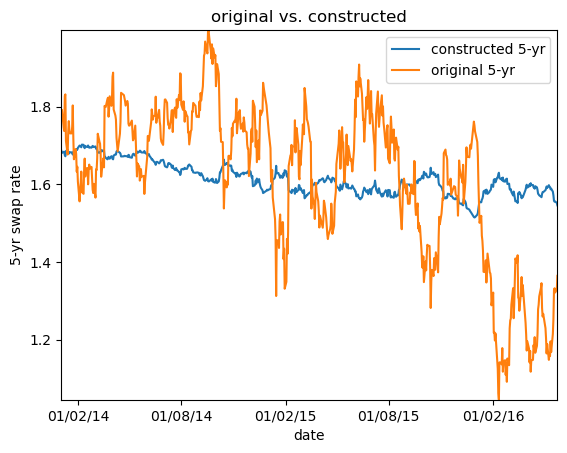

In [6]:
len1 = len(df)

t1 = 0
t2 = int(np.ceil(len1/2))

xX = df.iloc[t1:t2,6:7]
yY = df.iloc[t1:t2,8:9]
regr = linear_model.LinearRegression()
regr.fit(xX, yY)
B = regr.coef_
b_0 = regr.intercept_
rSquared = regr.score(xX, yY)

print(b_0, B)
print(rSquared)

yHat = b_0 + df.iloc[t1:t2,6:7] @ B.T

#plot data
#plt.figure(figsize=(18,6)) # set the figure size

plt.plot(df.iloc[t1:t2,0], yHat)
plt.plot(df.iloc[t1:t2,0], df.iloc[t1:t2,8:9])

#adjust display setting
#plt.figure(figsize=(8,5)) # set the figure size
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation='horizontal',horizontalalignment='center')

plt.xlabel('date')
plt.ylabel('5-yr swap rate')
plt.title('original vs. constructed')
plt.legend(labels = ['constructed 5-yr','original 5-yr'], loc='best')

plt.show()

# regress 5-yr against 2-yr (from May 25, 2016 to Oct 11, 2018)

[0.43706762] [[0.90311227]]
0.9682282818395735


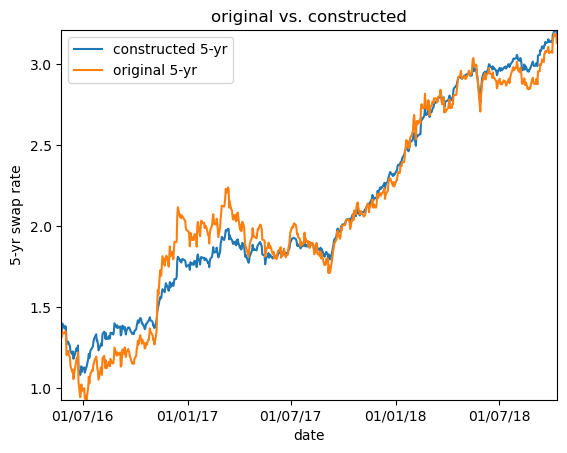

In [7]:
len1 = len(df)

t1 = int(np.ceil(len1/2))
t2 = len1

xX = df.iloc[t1:t2,6:7]
yY = df.iloc[t1:t2,8:9]
regr = linear_model.LinearRegression()
regr.fit(xX, yY)
B = regr.coef_
b_0 = regr.intercept_
rSquared = regr.score(xX, yY)

print(b_0, B)
print(rSquared)

yHat = b_0 + df.iloc[t1:t2,6:7] @ B.T

#plot data
#plt.figure(figsize=(18,6)) # set the figure size

plt.plot(df.iloc[t1:t2,0], yHat)
plt.plot(df.iloc[t1:t2,0], df.iloc[t1:t2,8:9])

#adjust display setting
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation='horizontal',horizontalalignment='center')

plt.xlabel('date')
plt.ylabel('5-yr swap rate')
plt.title('original vs. constructed')
plt.legend(labels = ['constructed 5-yr','original 5-yr'], loc='best')

plt.show()

# regress 5-yr against 2-yr (from Jan 2, 2014 to Oct 11, 2018)

[1.03876557] [[0.62619905]]
0.7688249645022384


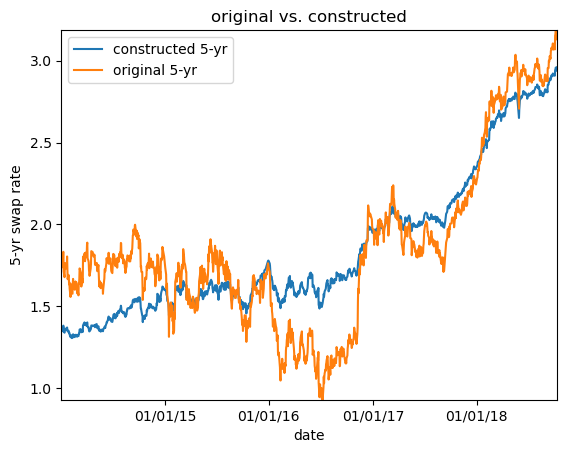

In [8]:
len1 = len(df)

t1 = 0
t2 = len1

xX = df.iloc[t1:t2,6:7]
yY = df.iloc[t1:t2,8:9]
regr = linear_model.LinearRegression()
regr.fit(xX, yY)
B = regr.coef_
b_0 = regr.intercept_
rSquared = regr.score(xX, yY)

print(b_0, B)
print(rSquared)

yHat = b_0 + df.iloc[t1:t2,6:7] @ B.T

#plot data
#plt.figure(figsize=(18,6)) # set the figure size

plt.plot(df.iloc[t1:t2,0], yHat)
plt.plot(df.iloc[t1:t2,0], df.iloc[t1:t2,8:9])

#adjust display setting
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
plt.xticks(rotation='horizontal',horizontalalignment='center')

plt.xlabel('date')
plt.ylabel('5-yr swap rate')
plt.title('original vs. constructed')
plt.legend(labels = ['constructed 5-yr','original 5-yr'], loc='best')

plt.show()

# regress 30-yr against 15-yr (from Jan 2, 2014 to May 24, 2016)

[0.02430841] [[1.08162197]]
0.9947866341576289


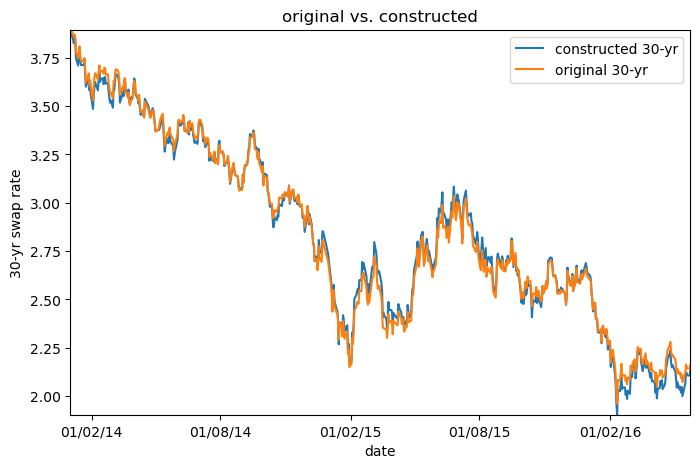

In [9]:
len1 = len(df)

t1 = 0
t2 = int(np.ceil(len1/2))

xX = df.iloc[t1:t2,11:12]
yY = df.iloc[t1:t2,12:13]
regr = linear_model.LinearRegression()
regr.fit(xX, yY)
B = regr.coef_
b_0 = regr.intercept_
rSquared = regr.score(xX, yY)

print(b_0, B)
print(rSquared)

yHat = b_0 + df.iloc[t1:t2,11:12] @ B.T

#plot data
plt.figure(figsize=(8,5)) # set the figure size

plt.plot(df.iloc[t1:t2,0], yHat)
plt.plot(df.iloc[t1:t2,0], df.iloc[t1:t2,12:13])

#adjust display setting
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation='horizontal',horizontalalignment='center')

plt.xlabel('date')
plt.ylabel('30-yr swap rate')
plt.title('original vs. constructed')
plt.legend(labels = ['constructed 30-yr','original 30-yr'], loc='best')

plt.show()

# regress 30-yr against 15-yr (from May 25, 2016 to Oct 11, 2018)

[0.44771641] [[0.85177058]]
0.9951693125273547


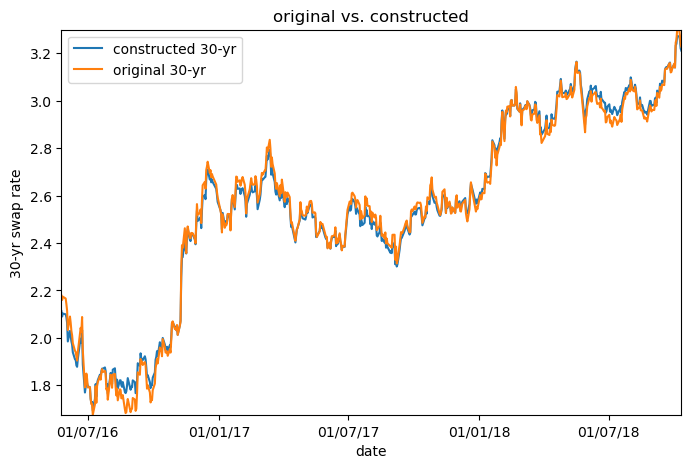

In [10]:
len1 = len(df)

t1 = int(np.ceil(len1/2))
t2 = len1

xX = df.iloc[t1:t2,11:12]
yY = df.iloc[t1:t2,12:13]
regr = linear_model.LinearRegression()
regr.fit(xX, yY)
B = regr.coef_
b_0 = regr.intercept_
rSquared = regr.score(xX, yY)

print(b_0, B)
print(rSquared)

yHat = b_0 + df.iloc[t1:t2,11:12] @ B.T

#plot data
plt.figure(figsize=(8,5)) # set the figure size

plt.plot(df.iloc[t1:t2,0], yHat)
plt.plot(df.iloc[t1:t2,0], df.iloc[t1:t2,12:13])

#adjust display setting
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation='horizontal',horizontalalignment='center')

plt.xlabel('date')
plt.ylabel('30-yr swap rate')
plt.title('original vs. constructed')
plt.legend(labels = ['constructed 30-yr','original 30-yr'], loc='best')

plt.show()

# regress 30-yr against 15-yr (from Jan 2, 2014 to Oct 11, 2018)

[0.1938514] [[0.98636103]]
0.953895616954445


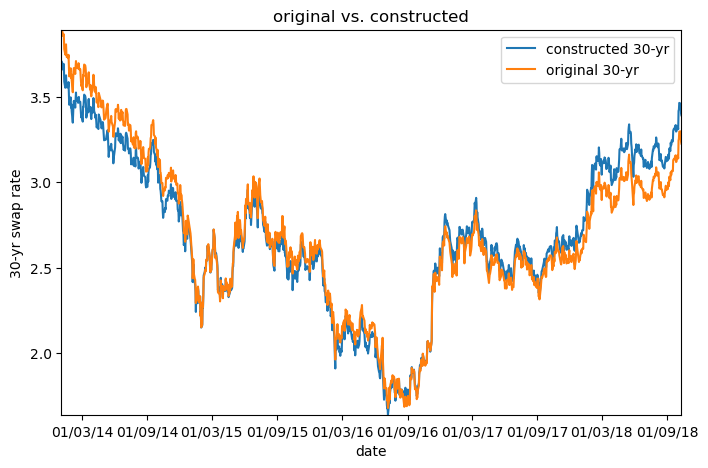

In [11]:
len1 = len(df)

t1 = 0
t2 = len1

xX = df.iloc[t1:t2,11:12]
yY = df.iloc[t1:t2,12:13]
regr = linear_model.LinearRegression()
regr.fit(xX, yY)
B = regr.coef_
b_0 = regr.intercept_
rSquared = regr.score(xX, yY)

print(b_0, B)
print(rSquared)

yHat = b_0 + df.iloc[t1:t2,11:12] @ B.T

#plot data
plt.figure(figsize=(8,5)) # set the figure size

plt.plot(df.iloc[t1:t2,0], yHat)
plt.plot(df.iloc[t1:t2,0], df.iloc[t1:t2,12:13])

#adjust display setting
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation='horizontal',horizontalalignment='center')

plt.xlabel('date')
plt.ylabel('30-yr swap rate')
plt.title('original vs. constructed')
plt.legend(labels = ['constructed 30-yr','original 30-yr'], loc='best')

plt.show()

# regress 30-yr against 2-yr, 5-yr, and 10-yr (from Jan 2, 2014 to May 24, 2016)

[0.35040478] [[ 0.01235598 -0.76618625  1.61493626]]
0.993819498301877


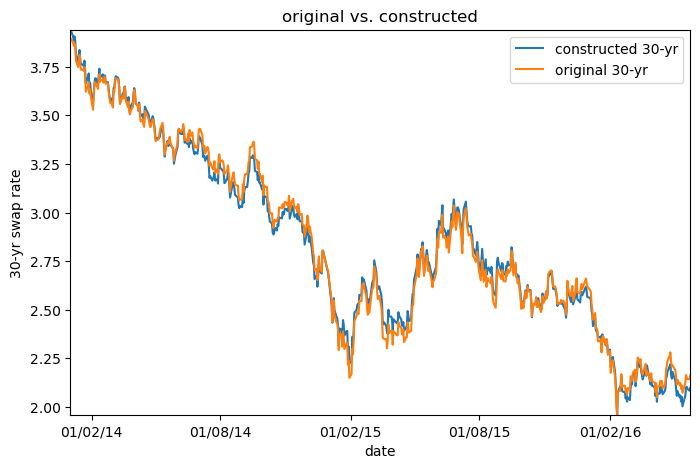

In [12]:
len1 = len(df)

t1 = 0
t2 = int(np.ceil(len1/2))

xX = df.iloc[t1:t2,[6,8,10]]
yY = df.iloc[t1:t2,12:13]
regr = linear_model.LinearRegression()
regr.fit(xX, yY)
B = regr.coef_
b_0 = regr.intercept_
rSquared = regr.score(xX, yY)

print(b_0, B)
print(rSquared)

yHat = b_0 + df.iloc[t1:t2,[6,8,10]] @ B.T

#plot data
plt.figure(figsize=(8,5)) # set the figure size

plt.plot(df.iloc[t1:t2,0], yHat)
plt.plot(df.iloc[t1:t2,0], df.iloc[t1:t2,12:13])

#adjust display setting
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation='horizontal',horizontalalignment='center')

plt.xlabel('date')
plt.ylabel('30-yr swap rate')
plt.title('original vs. constructed')
plt.legend(labels = ['constructed 30-yr','original 30-yr'], loc='best')

plt.show()